<a href="https://colab.research.google.com/github/Mostak-Ahmmed/Data-Mining/blob/main/213902126_B_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import matplotlib.pyplot as plt

student_data = {
    'student_id': [201, 202, 203, 204, 205],
    'cgpa': [3.5, 3.0, 2.9, 4.0, 2.6],
    'major': ['IT', 'ECE', 'finance', 'It', 'Socology'],
    'internships': [1, 2, 0, 2, 1],
    'placed': ['yes', 'no', 'no', 'yes', 'no']
}


student_data = pd.DataFrame(student_data)

student_data


,student_id,cgpa,major,internships,placed
0,201,3.5,IT,1,yes
1,202,3.0,ECE,2,no
2,203,2.9,finance,0,no
3,204,4.0,It,2,yes
4,205,2.6,Socology,1,no


In [ ]:
student_data['cgpa_original'] = student_data['cgpa']



scaler = MinMaxScaler()
student_data[['cgpa', 'internships']] = scaler.fit_transform(student_data[['cgpa', 'internships']])


encoder = LabelBinarizer()
student_data['placed_encoded'] = encoder.fit_transform(student_data['placed'])
student_data = pd.get_dummies(student_data, columns=['major'], prefix=['major'])


student_data


,student_id,cgpa,internships,placed,cgpa_original,placed_encoded,major_ECE,major_IT,major_It,major_Socology,major_finance
0,201,0.642857,0.5,yes,3.5,1,False,True,False,False,False
1,202,0.285714,1.0,no,3.0,0,True,False,False,False,False
2,203,0.214286,0.0,no,2.9,0,False,False,False,False,True
3,204,1.000000,1.0,yes,4.0,1,False,False,True,False,False
4,205,0.000000,0.5,no,2.6,0,False,False,False,True,False


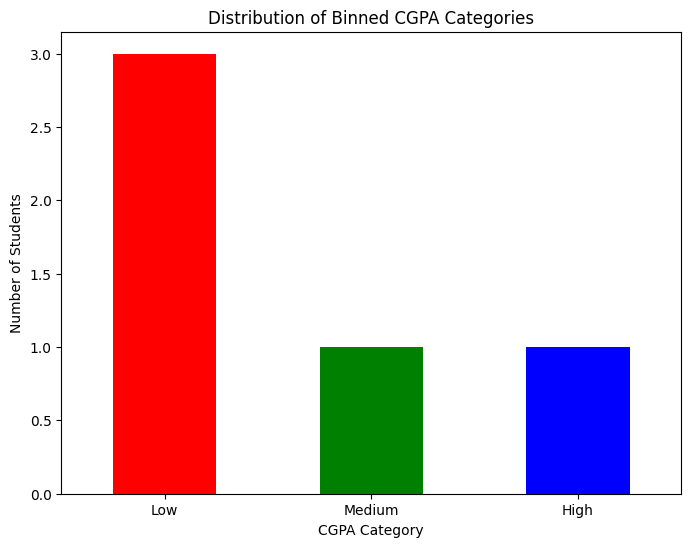

,student_id,cgpa,internships,placed,cgpa_original,placed_encoded,major_ECE,major_IT,major_It,major_Socology,major_finance,cgpa_bin
0,201,0.642857,0.5,yes,3.5,1,False,True,False,False,False,Medium
1,202,0.285714,1.0,no,3.0,0,True,False,False,False,False,Low
2,203,0.214286,0.0,no,2.9,0,False,False,False,False,True,Low
3,204,1.000000,1.0,yes,4.0,1,False,False,True,False,False,High
4,205,0.000000,0.5,no,2.6,0,False,False,False,True,False,Low


In [ ]:

bins = [0, 3.0, 3.5, 4.5]
labels = ['Low', 'Medium', 'High']
student_data['cgpa_bin'] = pd.cut(student_data['cgpa_original'], bins=bins, labels=labels, include_lowest=True)



plt.figure(figsize=(8, 6))
student_data['cgpa_bin'].value_counts().sort_index().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribution of Binned CGPA Categories')
plt.xlabel('CGPA Category')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()


